# IPL : Team Head-to-Head Analysis (Part 3)

#### *IPL : Season-Wise Analysis (Part 1)*
#### *IPL : Team-Wise Analysis (Part 2)*

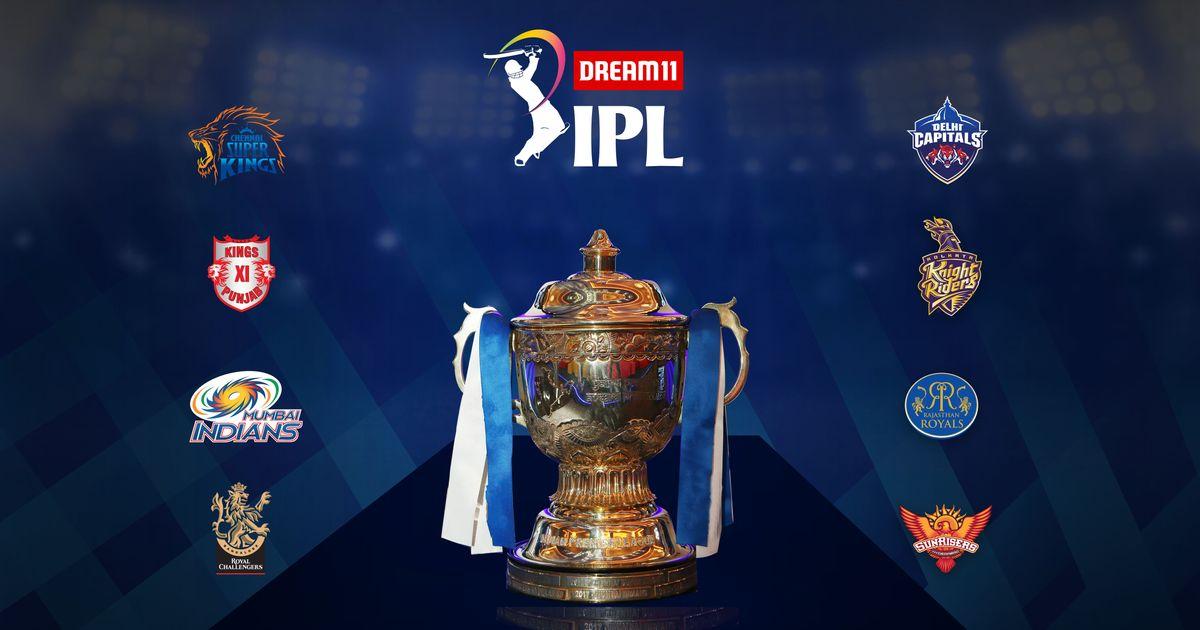

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from IPython.display import Javascript

In [ ]:
matches=pd.read_csv('matches.csv')

deliveries=pd.read_csv('deliveries.csv')

In [ ]:
deliveries = pd.merge(deliveries,matches[['id','season']],left_on='match_id',right_on='id').drop(['id'], axis = 1)

deliveries=deliveries.replace(to_replace ='Rising Pune Supergiant', value ='Rising Pune Supergiants')
matches=matches.replace(to_replace ='Rising Pune Supergiant', value ='Rising Pune Supergiants')

matches['city']=matches['city'].replace(to_replace ='Bangalore', value ='Bengaluru')
matches['city']=matches['city'].replace(to_replace ='Mohali', value ='Chandigarh')
matches['city']=matches['city'].replace(to_replace ='Dharamsala', value ='Dharamshala')

matches['toss_decision']=matches['toss_decision'].replace(to_replace ='bat', value ='Bat')
matches['toss_decision']=matches['toss_decision'].replace(to_replace ='field', value ='Field')

* ### User Input

In [ ]:
first_values=list(matches.team1.unique())
second_values=list(matches.team1.unique())
drop_first = widgets.Dropdown(options =first_values,description='Team 1 :',disabled=False,value='Chennai Super Kings')
drop_second = widgets.Dropdown(options =second_values,description='Team 2 :',disabled=False,value='Mumbai Indians')
display(drop_first)
display(drop_second)

In [ ]:
first=drop_first.value
second=drop_second.value
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index(), IPython.notebook.ncells())'))

button = widgets.Button(description="Get Data",style= {'button_color':'pink'})
button.on_click(run_all)
display(button)

In [ ]:
matches_h2h=matches[((matches.team1==first)&(matches.team2==second))|((matches.team1==second)&(matches.team2==first))]
deliveries_h2h=deliveries[((deliveries.batting_team==first)&(deliveries.bowling_team==second))|((deliveries.batting_team==second)&(deliveries.bowling_team==first))]

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

* ### Head to Head Results

In [ ]:
def results_h2h(first,second):
    matches_h2h_copy=matches_h2h[matches_h2h.result!='no result']
    first_wins=matches_h2h_copy[matches_h2h_copy.winner==first].winner.value_counts()
    first_wins=list(first_wins.values)
    second_wins=matches_h2h_copy[matches_h2h_copy.winner==second].winner.value_counts()
    second_wins=list(second_wins.values)
    fig = px.pie(names = [first,second], values = [first_wins,second_wins],
                     title =('Wins for each team in {} vs {} fixtures'.format(first,second)),hole = 0.6)
    fig.update_traces(textinfo='value') 
    fig.show()

results_h2h(first,second)

* ### Toss wins

In [ ]:
def h2h_toss_wins(first,second):
    first_toss_wins=matches_h2h[matches_h2h.toss_winner==first].toss_winner.value_counts()
    first_toss_wins=list(first_toss_wins.values)
    second_toss_wins=matches_h2h[matches_h2h.toss_winner==second].toss_winner.value_counts()
    second_toss_wins=list(second_toss_wins.values)
    fig = px.pie(names = [first,second], values = [first_toss_wins,second_toss_wins],
                     title =('Toss wins for each team in {} vs {} fixtures'.format(first,second)),hole = 0.6)
    fig.update_traces(textinfo='value') 
    fig.show()
    
h2h_toss_wins(first,second)

* ### Highest Run scorers

In [ ]:
def most_runs_h2h(first,second):
    runs=pd.DataFrame((deliveries_h2h[deliveries_h2h['batsman']==i][:].batsman_runs.sum()) for i in deliveries_h2h.batsman.value_counts().index)
    batsman=pd.DataFrame((deliveries_h2h[deliveries_h2h['batsman']==i][:].batsman.unique()) for i in deliveries_h2h.batsman.value_counts().index)
    most_runs_h2h=pd.concat([runs,batsman],axis=1, ignore_index=True)
    most_runs_h2h.columns=['Runs','Batsman']
    most_runs_h2h=most_runs_h2h.sort_values(by=['Runs'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_runs_h2h['Batsman'])),y=(list(most_runs_h2h['Runs'])),color = (list(most_runs_h2h['Batsman'])),
               labels={'x': 'Batsman','y': 'Runs','color':'Batsman'},
               title=('Highest Run scorers in {} vs {} fixtures'.format(first,second)))
    fig.show() 
    
most_runs_h2h(first,second)

* ### Most Half-Centuries

In [ ]:
def most_fifties_h2h(first,second):
    player=[]
    for i in list(deliveries_h2h['match_id'].value_counts().index.sort_values()):
        match=deliveries_h2h[deliveries_h2h['match_id']==i][:]
        batsman_runs=match.groupby('batsman')['batsman_runs'].sum()
        for j in (batsman_runs.index):
            if batsman_runs[j]>=50 and batsman_runs[j]<100:
                player.append(j)

    player_df=pd.DataFrame(player)
    player_df.columns=['player']
    
    fig=px.bar(x=player_df.player.value_counts().index[0:10],y=player_df.player.value_counts().values[0:10],color =player_df.player.value_counts().index[0:10],
               labels={'x': 'Player','y': 'Half-Centuries','color':'Player'},
               title=('Players who scored the most Half-Centuries in {} vs {} fixtures'.format(first,second)))
    return fig.show()

most_fifties_h2h(first,second)

* ### Highest Individual Scores

In [ ]:
def highest_ind_scores_h2h(first,second):
    batsman=[]
    batsman_runs=[]
    for i in list(deliveries_h2h['match_id'].value_counts().index.sort_values()):
        match=deliveries_h2h[deliveries_h2h['match_id']==i][:]
        batsman_runs=match.groupby('batsman')['batsman_runs'].sum()
        for j in (batsman_runs.index):
            if batsman_runs[j]==batsman_runs.values.max():
                batsman.append([batsman_runs[j],j])

    batsman.sort(reverse = True)
    player=[]
    runs=[]
    for i in range(0,len(batsman)):
        player.append(batsman[i][1])
        runs.append(batsman[i][0])
        
    for i in set(player):
        for j in range(0,len(player)):
            if player[j]==i:
                player[j]=player[j]+' '*j
    # Done to avoid stacked plots for repeating player values in x-axis
    
    fig=px.bar(x=player[0:10],y=runs[0:10],color=player[0:10],
               labels={'x': 'Player','y': 'Runs','color':'Player'},
               title=('Highest Individual Scores in {} vs {} fixtures'.format(first,second)))  
    return fig.show()

highest_ind_scores_h2h(first,second)

* ### Most Sixes

In [ ]:
def most_sixes_h2h(first,second):
    del_h2h_copy=deliveries_h2h[deliveries_h2h.batsman_runs ==6]
    sixes=pd.DataFrame((del_h2h_copy[del_h2h_copy['batsman']==i][:].batsman.value_counts().sum()) for i in del_h2h_copy.batsman.value_counts().index)
    batsman=pd.DataFrame((del_h2h_copy[del_h2h_copy['batsman']==i][:].batsman.unique()) for i in del_h2h_copy.batsman.value_counts().index)
    most_sixes_h2h=pd.concat([sixes,batsman],axis=1, ignore_index=True)
    most_sixes_h2h.columns=['Sixes','Batsman']
    most_sixes_h2h=most_sixes_h2h.sort_values(by=['Sixes'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_sixes_h2h['Batsman'])),y=(list(most_sixes_h2h['Sixes'])),color = (list(most_sixes_h2h['Batsman'])),
               labels={'x': 'Batsman','y': 'Sixes','color':'Batsman'},
               title=('Batsmen with most Sixes in {} vs {} fixtures'.format(first,second)))
    return fig.show()

most_sixes_h2h(first,second)

* ### Most Fours

In [ ]:
def most_fours_h2h(first,second):
    del_h2h_copy=deliveries_h2h[deliveries_h2h.batsman_runs ==4]
    fours=pd.DataFrame((del_h2h_copy[del_h2h_copy['batsman']==i][:].batsman.value_counts().sum()) for i in del_h2h_copy.batsman.value_counts().index)
    batsman=pd.DataFrame((del_h2h_copy[del_h2h_copy['batsman']==i][:].batsman.unique()) for i in del_h2h_copy.batsman.value_counts().index)
    most_fours_h2h=pd.concat([fours,batsman],axis=1, ignore_index=True)
    most_fours_h2h.columns=['Fours','Batsman']
    most_fours_h2h=most_fours_h2h.sort_values(by=['Fours'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_fours_h2h['Batsman'])),y=(list(most_fours_h2h['Fours'])),color = (list(most_fours_h2h['Batsman'])),
               labels={'x': 'Batsman','y': 'Fours','color':'Batsman'},
               title=('Batsmen with most Fours in {} vs {} fixtures'.format(first,second)))
    return fig.show()

most_fours_h2h(first,second)

* ### Highest Wicket takers

In [ ]:
def most_wickets_h2h(first,second):
    del_team_copy=deliveries_h2h[(deliveries_h2h.player_dismissed.notna())&(deliveries_h2h.dismissal_kind !='run out')&(deliveries_h2h.dismissal_kind !='obstructing the field')&(deliveries_h2h.dismissal_kind !='retired hurt')]
    wickets=pd.DataFrame((del_team_copy[del_team_copy['bowler']==i][:].bowler.value_counts().sum()) for i in del_team_copy.bowler.value_counts().index)
    bowler=pd.DataFrame((del_team_copy[del_team_copy['bowler']==i][:].bowler.unique()) for i in del_team_copy.bowler.value_counts().index)
    most_wickets_team=pd.concat([wickets,bowler],axis=1, ignore_index=True)
    most_wickets_team.columns=['Wickets','Bowler']
    most_wickets_team=most_wickets_team.sort_values(by=['Wickets'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_wickets_team['Bowler'])),y=(list(most_wickets_team['Wickets'])),color = (list(most_wickets_team['Bowler'])),
               labels={'x': 'Bowler','y': 'Wickets','color':'Bowler'},
               title=('Highest Wicket takers in {} vs {} fixtures'.format(first,second)))
    return fig.show()

most_wickets_h2h(first,second)

* ### Most Catches

In [ ]:
def most_catches_h2h(first,second):
    del_h2h_copy=deliveries_h2h[deliveries_h2h.dismissal_kind=='caught']
    catches=pd.DataFrame((del_h2h_copy[del_h2h_copy['fielder']==i][:].fielder.value_counts().sum()) for i in del_h2h_copy.fielder.value_counts().index)
    fielder=pd.DataFrame((del_h2h_copy[del_h2h_copy['fielder']==i][:].fielder.unique()) for i in del_h2h_copy.fielder.value_counts().index)
    most_catches_h2h=pd.concat([catches,fielder],axis=1, ignore_index=True)
    most_catches_h2h.columns=['Catches','Fielder']
    most_catches_h2h=most_catches_h2h.sort_values(by=['Catches'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_catches_h2h['Fielder'])),y=(list(most_catches_h2h['Catches'])),color = (list(most_catches_h2h['Fielder'])),
               labels={'x': 'Player','y': 'Catches','color':'Player'},
               title=('Players with most Catches in {} vs {} fixtures'.format(first,second))) 
    return fig.show()

most_catches_h2h(first,second)

* ### Most Run-outs

In [ ]:
def most_runouts_h2h(first,second):
    del_h2h_copy=deliveries_h2h[deliveries_h2h.dismissal_kind=='run out']
    runouts=pd.DataFrame((del_h2h_copy[del_h2h_copy['fielder']==i][:].fielder.value_counts().sum()) for i in del_h2h_copy.fielder.value_counts().index)
    fielder=pd.DataFrame((del_h2h_copy[del_h2h_copy['fielder']==i][:].fielder.unique()) for i in del_h2h_copy.fielder.value_counts().index)
    most_runouts_h2h=pd.concat([runouts,fielder],axis=1, ignore_index=True)
    most_runouts_h2h.columns=['Run-outs','Fielder']
    most_runouts_h2h=most_runouts_h2h.sort_values(by=['Run-outs'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_runouts_h2h['Fielder'])),y=(list(most_runouts_h2h['Run-outs'])),color = (list(most_runouts_h2h['Fielder'])),
               labels={'x': 'Player','y': 'Run-outs','color':'Player'},
               title=('Players who effected most Run-outs in {} vs {} fixtures'.format(first,second))) 
    return fig.show()

most_runouts_h2h(first,second)

* ### Most Man of the match awards

In [ ]:
def most_motms_h2h(team,season):
    motms=pd.DataFrame((matches_h2h[matches_h2h['player_of_match']==i][:].player_of_match.value_counts().sum()) for i in matches_h2h.player_of_match.value_counts().index)
    player=pd.DataFrame((matches_h2h[matches_h2h['player_of_match']==i][:].player_of_match.value_counts().index) for i in matches_h2h.player_of_match.value_counts().index)
    most_motms_h2h=pd.concat([motms,player],axis=1, ignore_index=True)
    most_motms_h2h.columns=['Man of the match awards','Player']
    most_motms_h2h=most_motms_h2h.sort_values(by=['Man of the match awards'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_motms_h2h['Player'])),y=(list(most_motms_h2h['Man of the match awards'])),color = (list(most_motms_h2h['Player'])),
               labels={'x': 'Player','y': 'Man of the match awards','color':'Player'},
               title=('Players who won the most Man of the match awards in {} vs {} fixtures'.format(first,second)))
    return fig.show()

most_motms_h2h(first,second)

* ### Geographical Plot of Matches played in each city

In [ ]:
def matches_city_h2h(first,second):    
    mat_copy=matches_h2h[matches_h2h['city'].notna()]

    city=pd.DataFrame((mat_copy[mat_copy['city']==i][:].city.value_counts().index) for i in mat_copy.city.value_counts().index)
    matches_num=pd.DataFrame((mat_copy[mat_copy['city']==i][:].city.value_counts().sum()) for i in mat_copy.city.value_counts().index)
    matches_city=pd.concat([city,matches_num],axis=1, ignore_index=True)
    matches_city.columns=['City','Matches']
    matches_city=matches_city.sort_values(by=['Matches'],ascending=False)

    lat_lon={'Mumbai':[19.0760, 72.8777],'Bengaluru':[12.9716,77.5946],'Kolkata':[22.5726, 88.3639],'Delhi':[28.7041, 77.1025],'Hyderabad':[17.3850, 78.4867],
            'Chennai':[13.0827, 80.2707],'Chandigarh':[30.7333, 76.7794],'Jaipur':[26.9124, 75.7873],'Pune':[18.5204, 73.8567],'Durban':[-29.8587, 31.0218],
            'Visakhapatnam':[17.6868, 83.2185],'Ahmedabad':[23.0225, 72.5714],'Centurion':[-25.8640, 28.0889],'Rajkot':[22.3039, 70.8022],'Indore':[22.7196, 75.8577],
            'Dharamshala':[32.2190, 76.3234],'Johannesburg':[-26.2041, 28.0473],'Cuttack':[20.4625, 85.8830],'Port Elizabeth':[-33.9608, 25.6022],'Abu Dhabi':[24.4539, 54.3773],
            'Ranchi':[23.3441, 85.3096],'Cape Town':[-33.9249, 18.4241],'Raipur':[21.2514, 81.6296],'Sharjah':[25.3463, 55.4209],'Kochi':[9.9312, 76.2673],
            'Kanpur':[26.4499, 80.3319],'Nagpur':[21.1458, 79.0882],'East London':[-33.0292, 27.8546],'Kimberley':[-28.7282, 24.7499],'Bloemfontein':[-29.0852, 26.1596],}

    city_geo=pd.DataFrame(list(lat_lon.keys())[i] for i in range(0,len(lat_lon)))
    lat_geo=pd.DataFrame(lat_lon[i][0] for i in city_geo[0])
    lon_geo=pd.DataFrame(lat_lon[i][1] for i in city_geo[0])
    city_lat_lon=pd.concat([city_geo,lat_geo,lon_geo],axis=1, ignore_index=True)
    city_lat_lon.columns=['City','Latitude','Longitude']

    total_matches_city_geo=pd.merge(matches_city,city_lat_lon,on='City')
    
    fig1 = px.density_mapbox(
    total_matches_city_geo,
    lat = 'Latitude',
    lon = 'Longitude',
    hover_name='City',
    hover_data={'Latitude':False,'Longitude':False,'Matches':True},
    color_continuous_scale='viridis',
    radius=9,zoom = 3.6, height =750,width=960 )
        
    fig2 = px.density_mapbox(
    total_matches_city_geo,
    lat = 'Latitude',
    lon = 'Longitude',
    hover_name='City',
    hover_data={'Latitude':False,'Longitude':False,'Matches':True},
    color_continuous_scale='viridis',
    radius=9,zoom = 4.5, height =700,width=960 )

    config={'scrollZoom': False}

    fig1.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lon=73,mapbox_center_lat=23)
    fig1.update_layout(title_text = 'Number of {} vs {} fixtures played in each City'.format(first,second))
    
    fig2.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lat=-28.5,mapbox_center_lon=24)

    return [fig1.show(config=config),fig2.show(config=config)]

matches_city_h2h(first,second)